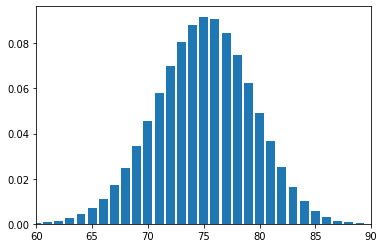

0.08222258891386612

In [221]:
# По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, 
# оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, 
# чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников 
# отметили высокий уровень стресса. 

# Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

from __future__ import division
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

n = 100
perc = 0.75
F_H0 = stats.binom(n, perc)
x = np.linspace(0,100,101)

plt.bar(x, F_H0.pmf(x), align = 'center')
plt.xlim(60, 90) 
plt.show()
stats.binom_test(67, n, perc)

In [222]:
# Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. 
# Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей 
# задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

stats.binom_test(22, 50, perc)

3.483147897830022e-06

In [241]:
# The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью 
# человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о 
# координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).
# Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.
# Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество 
# сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию 
#                          scipy.stats.binned_statistic_2d).
# Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? 
# В правильном ответе два знака после десятичной точки.


pines_data = pd.read_table('pines.txt')
x, y = pines_data.iloc[:, 0].values, pines_data.iloc[:, 1].values
binx, biny = [0.0, 40.0, 80.0, 120.0, 160.0, 200.0], [0.0, 40.0, 80.0, 120.0, 160.0, 200.0]
ret = stats.binned_statistic_2d(x, y, None, 'count', bins=[binx, biny]).statistic
sum_ret, len_ret = 0, 0
for i in ret:
    for j in i:
        len_ret += 1
        sum_ret += j
print(sum_ret/len_ret)

[18. 26. 29. 25. 20. 14. 12. 22. 34. 25. 12. 24. 15. 50. 37.  8. 19. 31.
 50.  7.  7.  8. 37. 27. 27.]
23.36


In [242]:
# Чтобы сравнить распределение сосен с равномерным, посчитайте значение
# статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

stats.chisquare(ret.flatten(), ddof = 1)

Power_divergenceResult(statistic=150.58904109589042, pvalue=9.87806178820889e-21)